In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

In [3]:
df = pd.read_csv('p1_dataset_elpino_raw.csv',delimiter=";")
cie9 = pd.read_csv('CIE9.csv',delimiter=";", encoding='latin-1')
cie10 = pd.read_csv('CIE10.csv',delimiter=";", encoding='latin-1')
grd = pd.read_csv('GRD.csv',delimiter=";", encoding='latin-1')

In [4]:
headlines = ['Diag 01 Principal (cod+des)', 'Diag 02 Secundario (cod+des)', 'Diag 03 Secundario (cod+des)', 'Diag 04 Secundario (cod+des)', 'Diag 05 Secundario (cod+des)', 'Diag 06 Secundario (cod+des)', 'Diag 07 Secundario (cod+des)', 'Diag 08 Secundario (cod+des)', 'Diag 09 Secundario (cod+des)', 'Diag 10 Secundario (cod+des)', 'Diag 11 Secundario (cod+des)', 'Diag 12 Secundario (cod+des)', 'Diag 13 Secundario (cod+des)', 'Diag 14 Secundario (cod+des)', 'Diag 15 Secundario (cod+des)', 'Diag 16 Secundario (cod+des)', 'Diag 17 Secundario (cod+des)', 'Diag 18 Secundario (cod+des)', 'Diag 19 Secundario (cod+des)', 'Diag 20 Secundario (cod+des)', 'Diag 21 Secundario (cod+des)', 'Diag 22 Secundario (cod+des)', 'Diag 23 Secundario (cod+des)', 'Diag 24 Secundario (cod+des)', 'Diag 25 Secundario (cod+des)', 'Diag 26 Secundario (cod+des)', 'Diag 27 Secundario (cod+des)', 'Diag 28 Secundario (cod+des)', 'Diag 29 Secundario (cod+des)', 'Diag 30 Secundario (cod+des)', 'Diag 31 Secundario (cod+des)', 'Diag 32 Secundario (cod+des)', 'Diag 33 Secundario (cod+des)', 'Diag 34 Secundario (cod+des)', 'Diag 35 Secundario (cod+des)', 'Proced 01 Principal (cod+des)', 'Proced 02 Secundario (cod+des)', 'Proced 03 Secundario (cod+des)', 'Proced 04 Secundario (cod+des)', 'Proced 05 Secundario (cod+des)', 'Proced 06 Secundario (cod+des)', 'Proced 07 Secundario (cod+des)', 'Proced 08 Secundario (cod+des)', 'Proced 09 Secundario (cod+des)', 'Proced 10 Secundario (cod+des)', 'Proced 11 Secundario (cod+des)', 'Proced 12 Secundario (cod+des)', 'Proced 13 Secundario (cod+des)', 'Proced 14 Secundario (cod+des)', 'Proced 15 Secundario (cod+des)', 'Proced 16 Secundario (cod+des)', 'Proced 17 Secundario (cod+des)', 'Proced 18 Secundario (cod+des)', 'Proced 19 Secundario (cod+des)', 'Proced 20 Secundario (cod+des)', 'Proced 21 Secundario (cod+des)', 'Proced 22 Secundario (cod+des)', 'Proced 23 Secundario (cod+des)', 'Proced 24 Secundario (cod+des)', 'Proced 25 Secundario (cod+des)', 'Proced 26 Secundario (cod+des)', 'Proced 27 Secundario (cod+des)', 'Proced 28 Secundario (cod+des)', 'Proced 29 Secundario (cod+des)', 'Proced 30 Secundario (cod+des)','GRD']
new_headlines = ['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30','GRD*']

In [5]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["Sexo (Desc)"]])
df = pd.concat([df, pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)], axis=1)

del df["Sexo (Desc)"]

In [6]:
for i in range(len(headlines)):
    df[new_headlines[i]] = df[headlines[i]].str.split(pat="-",n = 1, expand = False).str[0]

In [7]:
for i in headlines:
    del df[i]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Edad en años  14561 non-null  int64  
 1   (Hombre,)     14561 non-null  float64
 2   (Mujer,)      14561 non-null  float64
 3   D01           14561 non-null  object 
 4   D02           14561 non-null  object 
 5   D03           14561 non-null  object 
 6   D04           14561 non-null  object 
 7   D05           14561 non-null  object 
 8   D06           14561 non-null  object 
 9   D07           14561 non-null  object 
 10  D08           14561 non-null  object 
 11  D09           14561 non-null  object 
 12  D10           14561 non-null  object 
 13  D11           14561 non-null  object 
 14  D12           14561 non-null  object 
 15  D13           14561 non-null  object 
 16  D14           14561 non-null  object 
 17  D15           14561 non-null  object 
 18  D16           14561 non-nu

In [9]:
df.head()

,Edad en años,"(Hombre,)","(Mujer,)",D01,D02,D03,D04,D05,D06,D07,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,GRD*
0,40,1.0,0.0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,...,99.04,90.39,99.84,88.72,90.42,90.52,91.39,91.33,87.03,184103
1,53,1.0,0.0,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,...,91.69,87.44,91.62,90.43,91.39,90.52,91.32,96.59,90.99,041013
2,65,1.0,0.0,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,...,91.33,90.39,99.84,91.73,90.53,99.26,89.39,89.66,89.65,041013
3,61,1.0,0.0,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,...,96.59,94.19,57.94,00.13,00.17,99.04,99.18,99.21,99.23,041023
4,30,1.0,0.0,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,...,99.21,99.29,90.52,91.39,91.32,93.90,99.15,96.59,45.13,041023


In [10]:
df.describe()

,Edad en años,"(Hombre,)","(Mujer,)"
count,14561.000000,14561.000000,14561.000000
mean,39.426550,0.339537,0.660463
std,24.681545,0.473568,0.473568
min,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,36.000000,0.000000,1.000000
75%,60.000000,1.000000,1.000000
max,121.000000,1.000000,1.000000


In [11]:
df.tail()

,Edad en años,"(Hombre,)","(Mujer,)",D01,D02,D03,D04,D05,D06,D07,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,GRD*
14556,26,0.0,1.0,E10.1,J45.9,F10.2,F17.2,Z91.1,,,...,,,,,,,,,,104101
14557,10,1.0,0.0,S09.9,W18.24,R55,,,,,...,,,,,,,,,,014242
14558,58,1.0,0.0,K92.1,I10,E11.9,I50.9,K25.9,M16.9,G47.3,...,,,,,,,,,,064182
14559,47,1.0,0.0,E78.1,I10,Z92.2,,,,,...,,,,,,,,,,104121
14560,73,1.0,0.0,S06.51,S06.21,W18.09,J69.0,D29.1,Z59.0,Z02.7,...,93.96,93.99,89.66,89.66,90.39,90.42,90.52,90.59,90.59,041203


In [12]:
df.isna().sum()

Edad en años    0
(Hombre,)       0
(Mujer,)        0
D01             0
D02             0
               ..
P27             0
P28             0
P29             0
P30             0
GRD*            0
Length: 69, dtype: int64

In [13]:
cie9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cï¿½digo       4646 non-null   float64
 1   Descripciï¿½n  4646 non-null   object 
 2   Categorï¿½a    4646 non-null   object 
 3   Secciï¿½n      4646 non-null   object 
 4   Capï¿½tulo     4646 non-null   object 
dtypes: float64(1), object(4)
memory usage: 181.6+ KB


In [14]:
cie10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25592 entries, 0 to 25591
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Código       25592 non-null  object
 1   Descripción  25592 non-null  object
dtypes: object(2)
memory usage: 400.0+ KB


In [15]:
grd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   IR-GRD CÓDIGO v2.3               699 non-null    int64 
 1   NOMBRE GRUPO GRD                 699 non-null    object
 2   CDM_COD                          699 non-null    int64 
 3   CATEGORÍA DIAGNÓSTICA MAYOR CDM  699 non-null    object
 4   TIPO_COD                         699 non-null    object
dtypes: int64(2), object(3)
memory usage: 27.4+ KB


In [16]:
df.iloc[53]["D02"]

''

In [17]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    null = []
    empty = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        null.append(df[item].isnull().sum())
        empty.append((df[item]=='').sum())


    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'null':null,
        'empty':empty,
        
        
    })    
        
    return output

In [18]:
pd.DataFrame(show_missing(df))

,variable,dtype,count,unique,missing,null,empty
0,Edad en años,int64,14561,103,0,0,0
1,"(Hombre,)",float64,14561,2,0,0,0
2,"(Mujer,)",float64,14561,2,0,0,0
3,D01,object,14561,1491,0,0,0
4,D02,object,14561,1717,0,0,1209
...,...,...,...,...,...,...,...
64,P27,object,14561,103,0,0,13138
65,P28,object,14561,100,0,0,13261
66,P29,object,14561,93,0,0,13379
67,P30,object,14561,92,0,0,13498


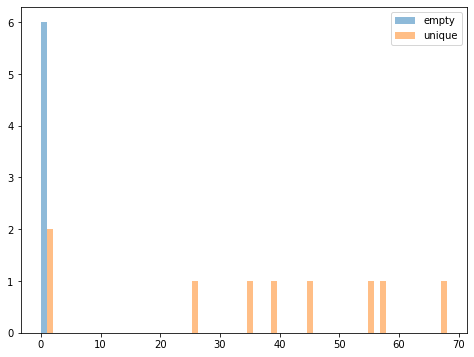

In [19]:
pd.set_option('display.max_rows', None)
#pd.DataFrame(show_missing(df))
#px.histogram(show_missing(df), x="variable", y="empty", barmode="overlay")
plt.figure(figsize=(8,6))
bins = np.linspace(0, 68, 68)
plt.hist(show_missing(df)["empty"], bins=bins, alpha=0.5, label='empty')
plt.hist(show_missing(df)["unique"], bins=bins, alpha=0.5, label='unique')
plt.legend(loc='upper right')
plt.show()

In [20]:
type(pd.DataFrame(show_missing(df)))

pandas.core.frame.DataFrame

In [21]:
show_missing(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   variable  69 non-null     object
 1   dtype     69 non-null     object
 2   count     69 non-null     int64 
 3   unique    69 non-null     int64 
 4   missing   69 non-null     int64 
 5   null      69 non-null     int64 
 6   empty     69 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.9+ KB


<AxesSubplot:ylabel='Count'>

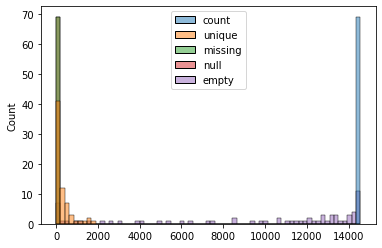

In [22]:

sb.histplot(data=show_missing(df), bins=69)#weights='unique' ,
            #palette='viridis', shrink=0.7 , x='variable'